## Basic packages

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import os

## TensorFlow

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras import preprocessing

# Q2: Training a CNN using CIFAR-10 Data

In [7]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

### 1. Show dataset

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

[6]


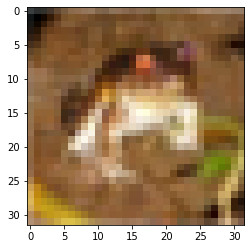

In [9]:
print(y_train[0])
plt.imshow(X_train[0])

### 2. CNN

### Data prep

In [10]:
# Creating flat index lists
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [11]:
# Normalize input values
X_train_norm = X_train.astype('float32')/255
X_test_norm = X_test.astype('float32')/255

In [12]:
# Image class for mapping
img_class_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Neural network structure

In [15]:
cnnModel = Sequential()
cnnModel.add(layers.Conv2D(64, (11, 11), activation='relu', input_shape=(32, 32, 3), kernel_initializer = tf.keras.initializers.HeNormal()))
cnnModel.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
cnnModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnModel.add(layers.AveragePooling2D())
cnnModel.add(layers.Flatten())
cnnModel.add(layers.Dense(128, activation='relu'))
cnnModel.add(layers.Dense(10, activation='softmax'))

cnnModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        23296     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 average_pooling2d_1 (Averag  (None, 3, 3, 128)        0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

CNN architecture: 
1. Convolutional layer with 64 filters of size 11x11 followed by ReLu activation function. Input: of original pictures from CIFAR10 dataset 
2. Pooling layer of size 2x2 with stride = 2. Pools highest number from subregions filter convolves around. Thus, reduces number of parameters to estimate and controls for NN overfitting. 
3. Convolutional layer with 128 filters of size 3x3 followed by ReLu activation function. 
4. Convolutional layer with 128 filters of size 3x3 followed by ReLu activation function.
5. Average pooling layer which pools across last conv layer output (feature map). Used to add translation invariance. 
6. End of network: Flattern, ReLu, Softmax - convert output features into interpretable format. Note, we use SoftMax because we have more than 2 label categories. 

Weights: HeNormal initializer which performs good with ReLu according to 
https://arxiv.org/pdf/1502.01852.pdf

Hyperparameters: 
1. Number and size of filters are set according to assignment instructions. 11x11 filter used for high level perspective and computational cost reduction. Other conv layers have 3x3 filters, hich is a common choice - small and odd. 
2. Stride = 2 meaning that filter shifts by 2 units (pixels) instead of 1. Decreases filters overlapping and results in smaller output dimension. 

In [16]:
# Compile & Fit
cnnModel.compile(optimizer='adam',
#                  optimizers.SGD(learning_rate=0.001,momentum=0.9),
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cnnModel.fit(X_train_norm, y_train, epochs=10, 
                    validation_data=(X_test_norm, y_test))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.6859 - accuracy: 0.3855 - val_loss: 1.4299 - val_accuracy: 0.4751
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4265 - accuracy: 0.4841 - val_loss: 1.3601 - val_accuracy: 0.5089
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3066 - accuracy: 0.5304 - val_loss: 1.2967 - val_accuracy: 0.5389
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.2101 - accuracy: 0.5683 - val_loss: 1.2357 - val_accuracy: 0.5572
Epoch 5/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.1326 - accuracy: 0.5976 - val_loss: 1.2286 - val_accuracy: 0.5656
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.0678 - accuracy: 0.6207 - val_loss: 1.2231 - val_accuracy: 0.5696
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0086 - accuracy: 0.6432 - val_loss: 1.1972 -

313/313 - 3s - loss: 1.2190 - accuracy: 0.5944 - 3s/epoch - 8ms/step


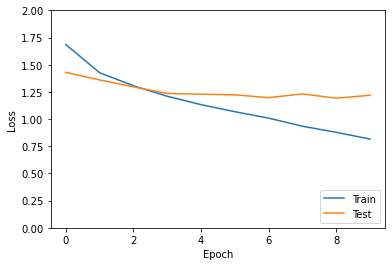

In [17]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')

test_loss, test_acc = cnnModel.evaluate(X_test_norm,  y_test, verbose=2)

In [19]:
print(round(test_acc,4))

0.5944


Test accurracy = 0.5944

## 3. Visualize first Conv Layer filters (RGB)

In [23]:
layer_names = [layer.name for layer in cnnModel.layers]
layer_names

['conv2d_3',
 'max_pooling2d_1',
 'conv2d_4',
 'conv2d_5',
 'average_pooling2d_1',
 'flatten_1',
 'dense_2',
 'dense_3']

### Visualized filters

conv2d_3 (11, 11, 3, 64)


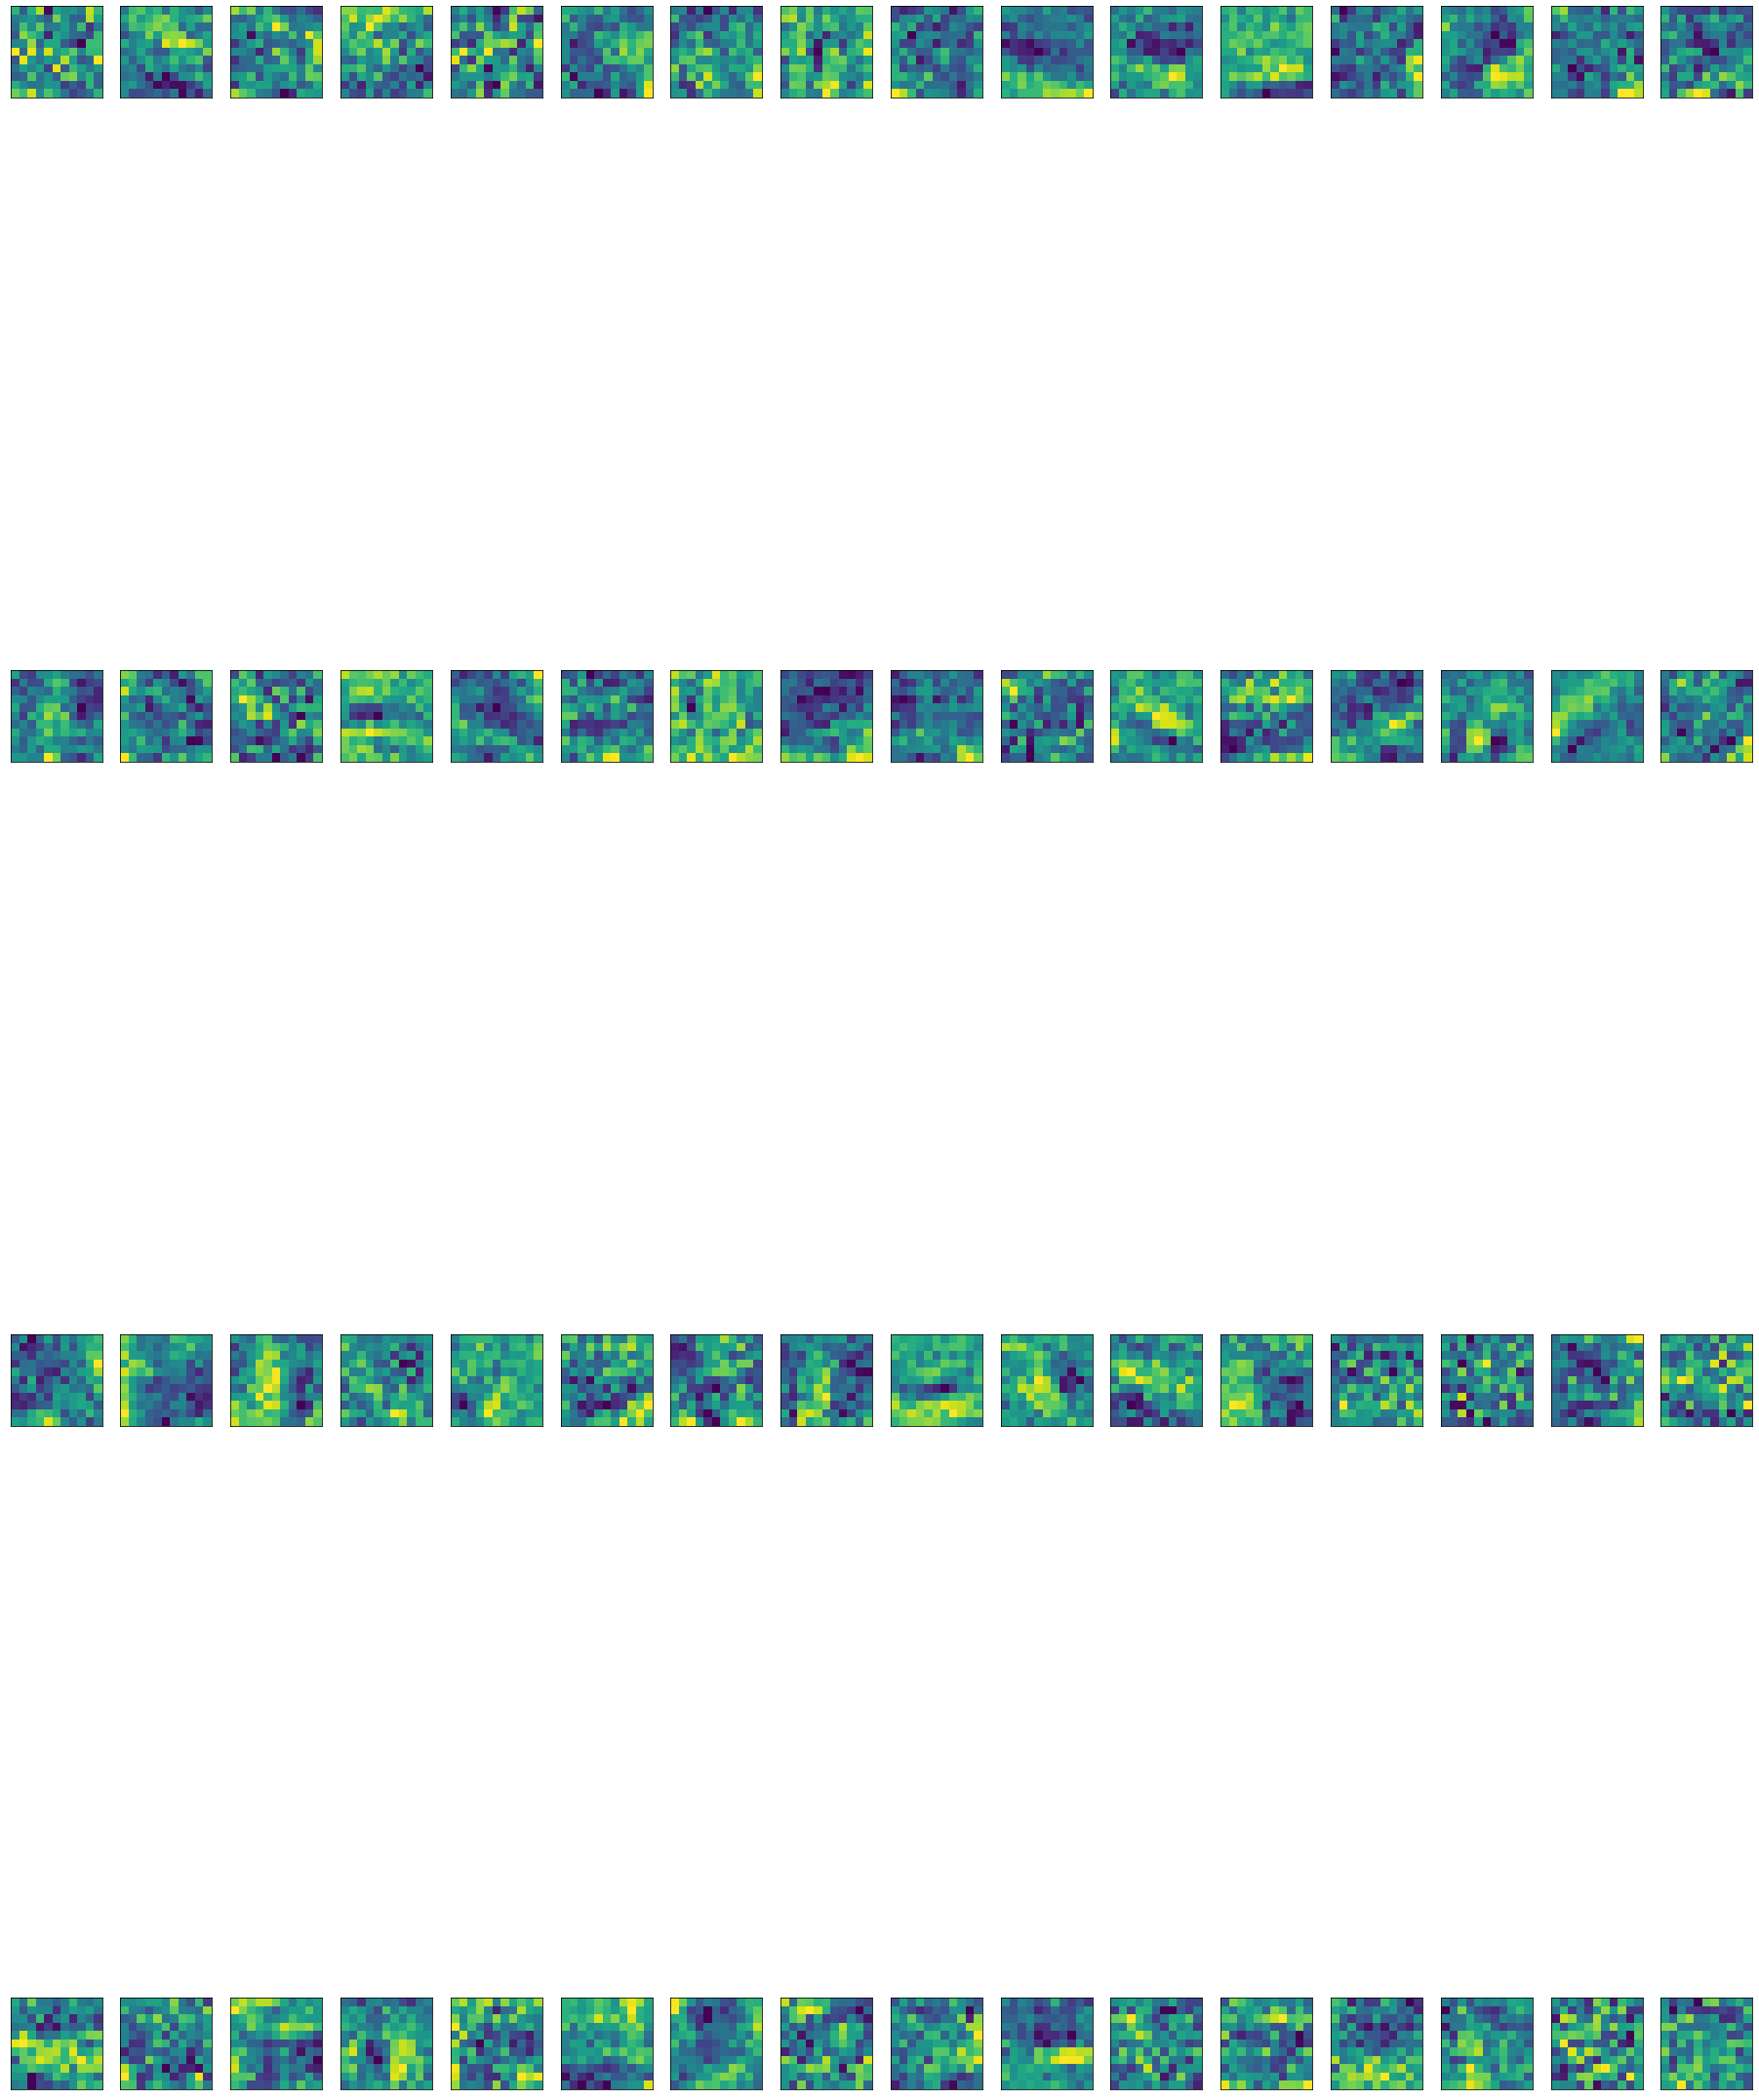

In [51]:
filters, b = cnnModel.layers[0].get_weights()
print(layer[0].name, filters.shape)

fig = plt.figure(figsize=(32, 48))
columns = 16
rows = 4
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig = plt.subplot(rows, columns, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(f[:, :, 0])
plt.show()    

### Batch normalisation

In [3]:
cnnModel_norm = Sequential()
cnnModel_norm.add(layers.Conv2D(64, (11, 11), activation='relu', input_shape=(32, 32, 3), kernel_initializer = tf.keras.initializers.HeNormal()))
cnnModel_norm.add(layers.BatchNormalization())
cnnModel_norm.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
cnnModel_norm.add(layers.BatchNormalization())
cnnModel_norm.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnModel_norm.add(layers.BatchNormalization())
cnnModel_norm.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnModel_norm.add(layers.BatchNormalization())
cnnModel_norm.add(layers.AveragePooling2D())
cnnModel_norm.add(layers.BatchNormalization())
cnnModel_norm.add(layers.Flatten())
cnnModel_norm.add(layers.Dense(128, activation='relu'))
cnnModel_norm.add(layers.Dense(10, activation='softmax'))

cnnModel_norm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 64)        23296     
                                                                 
 batch_normalization (BatchN  (None, 22, 22, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 128)         73856     
                                                        

2022-05-26 22:12:18.755086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [54]:
# Compile & Fit
cnnModel_norm.compile(optimizer='adam',
#                  optimizers.SGD(learning_rate=0.001,momentum=0.9),
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_norm = cnnModel_norm.fit(X_train_norm, y_train, epochs=10, 
                    validation_data=(X_test_norm, y_test))

Epoch 1/10
1563/1563 [==============================] - 105s 67ms/step - loss: 1.6019 - accuracy: 0.4374 - val_loss: 1.8588 - val_accuracy: 0.3904
Epoch 2/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.2358 - accuracy: 0.5625 - val_loss: 1.6689 - val_accuracy: 0.4332
Epoch 3/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.0862 - accuracy: 0.6157 - val_loss: 1.3462 - val_accuracy: 0.5403
Epoch 4/10
1563/1563 [==============================] - 104s 67ms/step - loss: 0.9751 - accuracy: 0.6551 - val_loss: 1.2594 - val_accuracy: 0.5733
Epoch 5/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.8694 - accuracy: 0.6932 - val_loss: 1.2952 - val_accuracy: 0.5652
Epoch 6/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.7774 - accuracy: 0.7247 - val_loss: 1.1216 - val_accuracy: 0.6120
Epoch 7/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.6902 - accuracy: 0.7551 - val_loss: 1

#### Model comparison

313/313 - 5s - loss: 1.3392 - accuracy: 0.6111 - 5s/epoch - 15ms/step


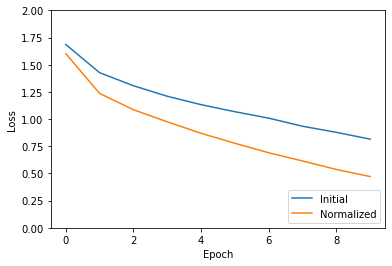

In [59]:
plt.plot(history.history['loss'], label='Initial')
plt.plot(history_norm.history['loss'], label = 'Normalized')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')

test_loss_norm, test_acc_norm = cnnModel_norm.evaluate(X_test_norm,  y_test, verbose=2)

In [60]:
print(round(test_acc_norm, 4))

0.6111


**Conclusion:** Batch normlisation leads to a better peerformance on a training set in this case. However difference of accuracy on a test set is not significant (59% vs 61%)

### Visualized filters

conv2d_3 (11, 11, 3, 64)


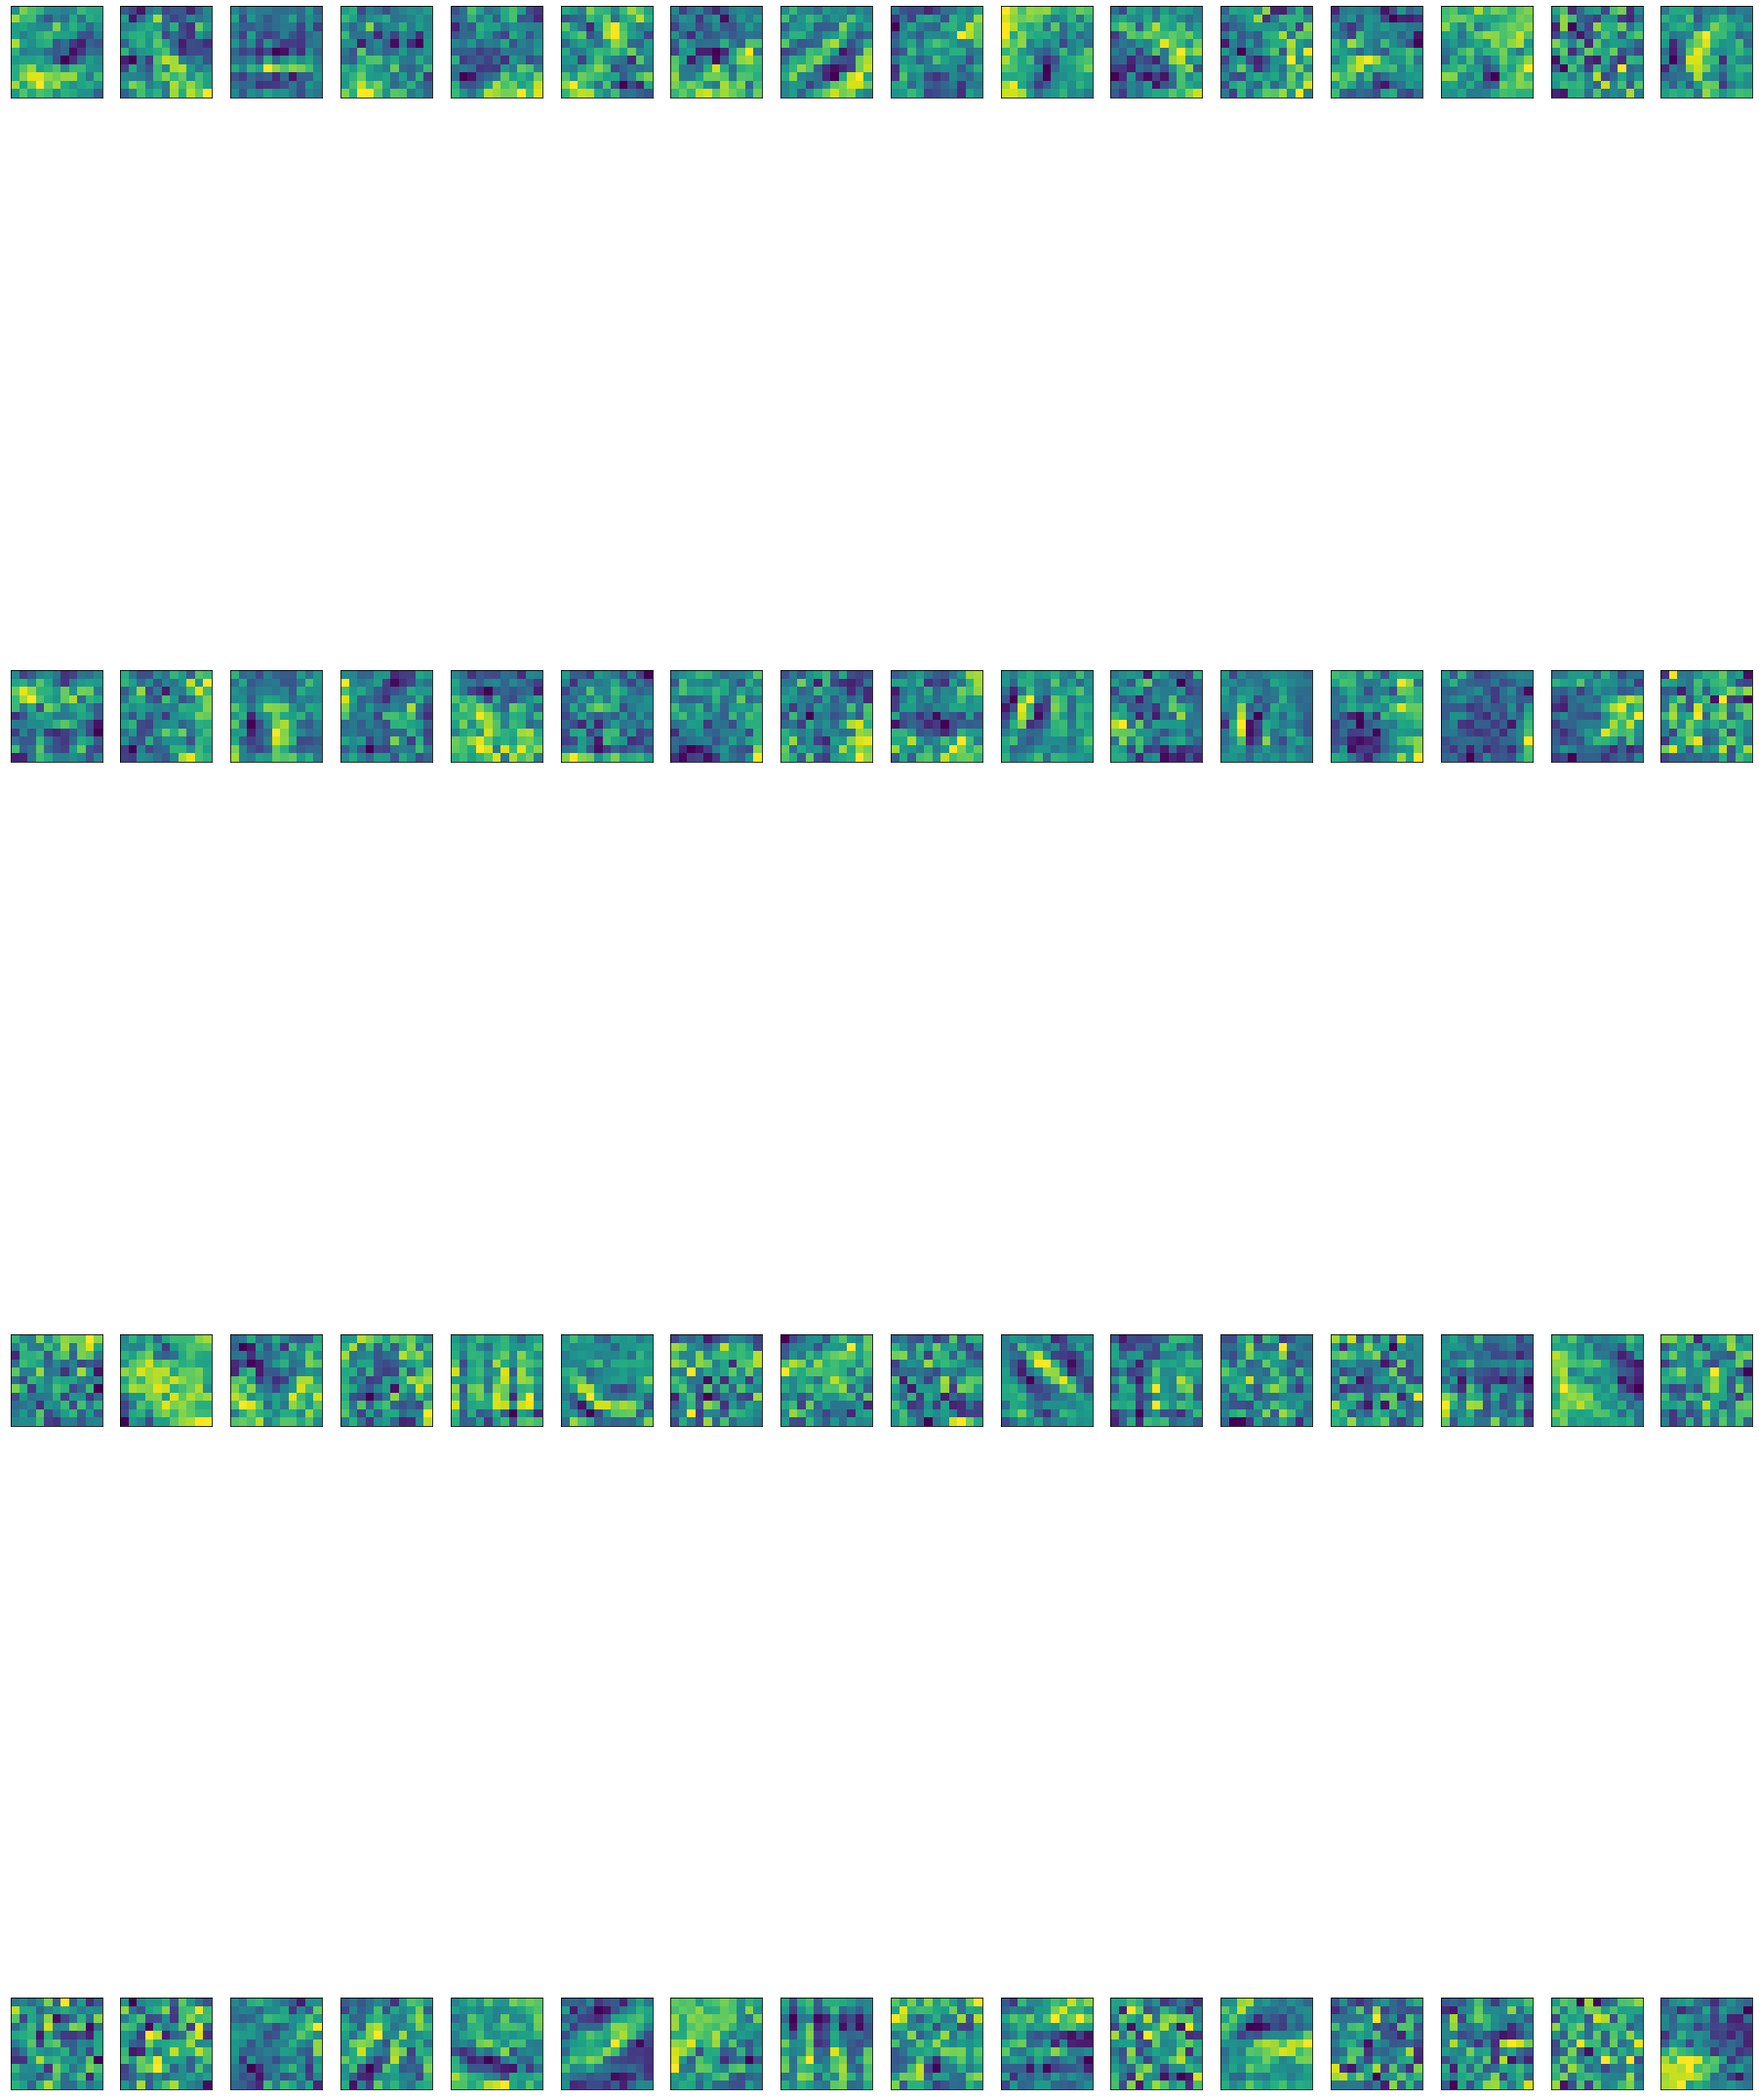

In [62]:
filters, b = cnnModel_norm.layers[0].get_weights()
print(layer[0].name, filters.shape)

fig = plt.figure(figsize=(32, 48))
columns = 16
rows = 4
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig = plt.subplot(rows, columns, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(f[:, :, 0])
plt.show()    

# Q3: GAN using Fasion-MNIST Data

## Load Data

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# Reshape data
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

## Vanilla GAN

In [6]:
# Normalize data and making it in range (-1; 1)
X_train =  X_train.astype('float32')
X_train = X_train/255
X_train = X_train*2 - 1.
print(X_train.max(),X_train.min())

1.0 -1.0


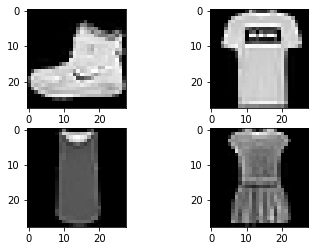

In [7]:
# Show sample pictures
fig,axe = plt.subplots(2,2)
idx = 0
for i in range(2):
    for j in range(2):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=1

In [8]:
# Generator Structure
generator = Sequential()
generator.add(layers.Dense(512, input_shape=[100], activation='relu'))
generator.add(layers.BatchNormalization())
generator.add(layers.Dense(256, activation='relu'))
generator.add(layers.BatchNormalization())
generator.add(layers.Dense(128, activation='relu'))
generator.add(layers.BatchNormalization())
generator.add(layers.Dense(784, activation= 'tanh'))
generator.add(layers.Reshape([28,28,1]))

2022-05-26 22:12:42.971668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_2 (Batc  (None, 128)              5

In [10]:
# Discriminator Structure
discriminator = Sequential()
discriminator.add(layers.Dense(1,input_shape=[28,28,1]))
discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(256, activation='relu'))
discriminator.add(layers.Dense(128, activation='relu'))
discriminator.add(layers.Dense(64, activation='relu'))
discriminator.add(layers.Dense(1,activation='sigmoid'))

In [11]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 28, 28, 1)         2         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 242,179
Trainable params: 242,179
Non-tr

In [12]:
# Training setup
epochs = 50
batchSize = 100
noiseShape=100
crossEntropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
gOptimizer = tf.keras.optimizers.Adam(1e-4)
dOptimizer = tf.keras.optimizers.Adam(1e-4)

In [13]:
# Define loss functions
def dLoss(real, fake):
    loss = crossEntropy(tf.ones_like(real), real) + crossEntropy(tf.zeros_like(fake), fake)
    return loss

def gLoss(fake):
    loss = crossEntropy(tf.ones_like(fake), fake)
    return loss

In [14]:
# Define training step
def trainStep(IMG):
    noise = tf.random.normal([batchSize, noiseShape])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gIMG = generator(noise, training=True)

        real = discriminator(IMG, training=True)
        fake = discriminator(gIMG, training=True)

        gL = gLoss(fake)
        dL = dLoss(real, fake)

    gOFg = gen_tape.gradient(gL, generator.trainable_variables)
    gOFd = disc_tape.gradient(dL, discriminator.trainable_variables)

    gOptimizer.apply_gradients(zip(gOFg, generator.trainable_variables))
    dOptimizer.apply_gradients(zip(gOFd, discriminator.trainable_variables))
    return gL, dL

Epoch: 1/50


/Users/alexander/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
1/1 [==============================] - 0s 299ms/step


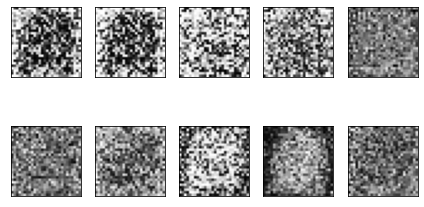

Epoch: 2/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 3/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 4/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 5/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 6/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 7/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 8/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 9/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
ba

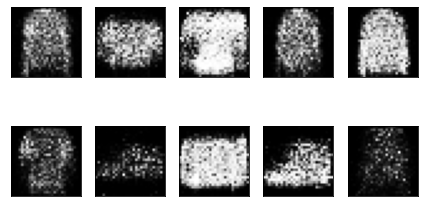

Epoch: 17/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 18/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 19/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 20/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 21/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 22/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 23/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 24/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batc

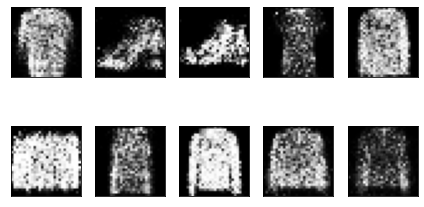

Epoch: 32/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 33/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 34/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 35/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 36/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 37/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 38/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 39/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batc

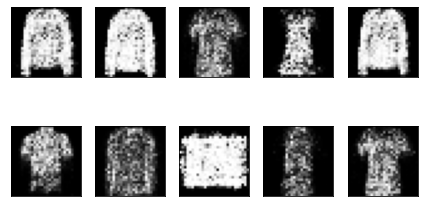

Epoch: 47/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 48/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 49/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600
Epoch: 50/50
batch 50
batch 100
batch 150
batch 200
batch 250
batch 300
batch 350
batch 400
batch 450
batch 500
batch 550
batch 600


In [15]:
seed = tf.random.normal([10, noiseShape])
train_dataset = tf.data.Dataset.from_tensor_slices(X_train).batch(batchSize)
# Training GAN
loss_data = []
for epoch in range(epochs):
    a = 0
    print(f'Epoch: {epoch+1}/{epochs}')
    for batch in train_dataset:
        a += 1
        if a % 50 == 0:
            print(f'batch {a}')
        g, d = trainStep(batch)
    loss_data.append([epoch,g,d])

    # plotting generated images for each 15 epochs (including first, middle and when converges cases)
    
    if epoch % 15 == 0:
        samples = 10
        result_print = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(result_print[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

1/1 [==============================] - 0s 18ms/step


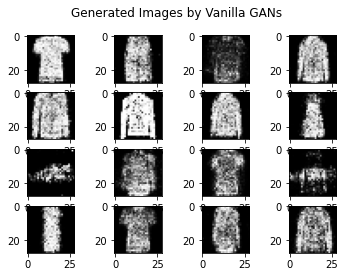

In [17]:
# Plot generated pics after training is complete
noise=np.random.normal(size=[16, noiseShape])
gen_image = generator.predict(noise)
fig,axe=plt.subplots(4,4)
fig.suptitle('Generated Images by Vanilla GANs')
idx=0
for i in range(4):
    for j in range(4):
        axe[i,j].imshow(gen_image[idx].reshape(28 ,28),cmap='gray')
        idx+=1

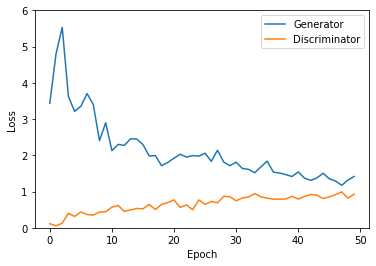

In [44]:
# Clean loss data
loss_data_ok = []
for loss in loss_data:
    loss_data_ok.append([loss[0] + 1, loss[1].numpy(), loss[2].numpy()])

loss_data_pd = pd.DataFrame(loss_data_ok, columns = ['Epoch', 'Gen', 'Disc'])

# Plot losses as function of Epochs
plt.plot(loss_data_pd.Gen, label='Generator')
plt.plot(loss_data_pd.Disc, label = 'Discriminator')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 6])
plt.legend(loc='upper right')

#### Observation:
They tend to converge